> **Student Names and IDs**:
>
> - Student 1, ID1 (Replace this item with your first and last name and student ID number.
Add more items like this as needed, including the `> -` characters at the beginning,
which generate the indent and the bullet.)

# Homework 2

## Part 1: Exam-Style Questions

### Problem 1.1

Write the "full" correlation $J = I \ast I$ of the following $2\times 2$ image with itself, using zero padding. Do _not_ normalize.

$$
I = \left[\begin{array}{cc}1 & 2\\0 & 3 \end{array}\right]
$$

### Answer

### Problem 1.2

Is the following convolution kernel separable? If so, separate it. If not, prove that it is not.

$$
H = \left[\begin{array}{rrr}2 & 0 & 6\\0 & 1 & 0\\1 & 0 & 3 \end{array}\right]
$$

### Answer

### Problem 1.3

Give expressions for the summation endpoints $s$ and $e$ in the formula for $c_i$ given above. Your expression should be in terms of $n$, $i$, and the $\max$ and/or $\min$ operators (maximum and minimum between two numbers).

### Answer

### Problem 1.4

Show that the "full" correlation $a \star b$ as defined in the previous problem does not commute.

### Answer

### Problem 1.5

Let
$$
c = a \star b \;\;\;\text{and}\;\;\; d = b \star a
$$
be the two "full" correlations between arbitrary, non-empty sequences $a, b$ of equal length $n+1$, as defined above.

Give a general expression for the relationship between $c$ and $d$. Specifically, how does the generic element $c_i$ of $c$ relate to the generic element $d_j$ of $d$?

No proof is necessary.

### Answer

## Part 2: Convolution

### Problem 2.1

Write a function with header

    def convolve(a, b, ctype='same'):

that takes two one-dimensional `numpy` arrays `a` and `b` and an optional convolution type specification `ctype` and returns the convolution of the two arrays as a `numpy` array. Assume that sequence `a` is no shorter than sequence `b`.

The possible values for `ctype` are `'full'`, `'same'` (the default), and `'valid'`. For the last two types, `a` is the signal and `b` is the kernel. For instance, `'same'` means that the output has the same size as `a`.

Show your code and the result of running the given test cases, which compare your implementation to `numpy.convolve`. It is OK if the `dtype` of your output differs from that of `numpy.convolve`.

### Answer

In [1]:
def convolve(a, b, ctype='same'):
    if ctype == 'full':
        J = np.zeros(len(a)+len(b)-1)
        a = np.pad(a, len(b)-1, 'constant', constant_values=0)
    elif ctype == 'valid':
        J = np.zeros(len(a)-len(b)+1)
    else: # ctype == 'same'
        J = np.zeros(len(a))
        a = np.pad(a, int(len(b)/2), 'constant', constant_values=0)
    for i in range(len(J)):
        J[i] = np.sum(np.multiply(b[::-1], a[i:len(b)+i]))
    return J

In [2]:
import numpy as np

signal = np.array([2, 1, -3, 0, 5])
kernel = np.array([2, 0, -1, -2])
ctypes = ('full', 'same', 'valid')

try:
    print('convolve:')
    for ctype in ctypes:
        print(ctype, ': ', convolve(signal, kernel, ctype), sep='')
    print()
    
    print('numpy.convolve:')
    for ctype in ctypes:
        print(ctype, ': ', np.convolve(signal, kernel, ctype), sep='')
    print()
except NameError:
    print('uh-oh')
    pass

convolve:
full: [  4.   2.  -8.  -5.  11.   6.  -5. -10.]
same: [ 2. -8. -5. 11.  6.]
valid: [-5. 11.]

numpy.convolve:
full: [  4   2  -8  -5  11   6  -5 -10]
same: [ 2 -8 -5 11  6]
valid: [-5 11]



### Problem 2.2

Write a function with header

    def convolve2d(I, H):
    
that takes a two-dimensional numerical `numpy` array `I` and a two-dimensional numerical `numpy` array `H`, both non-empty, _and uses_ `np.convolve` (the `numpy` one-dimensional convolution function) to implement the (two-dimensional) convolution of `I` and `H` of style `same`. Do _not_ use any other convolution operators.

Show your code and the result of running the given test cases, which compare your implementation to `scipy.signal.convolve2d` when called with the `'same'` option. It is OK if the `dtype` of your output differs from that of `scipy.signal.convolve2d`.

### Answer

In [3]:
a = np.array([[0, 1], 
              [2, 3]])
J = np.zeros(a.shape)
b = np.pad(a, 1, 'constant', constant_values=0)
b

array([[0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 2, 3, 0],
       [0, 0, 0, 0]])

In [4]:
def convolve2d(I, H):
    J = np.zeros(I.shape)
    

In [5]:
from scipy import signal as ss
import numpy as np

a = np.array([[10, 11, 12], 
              [20, 21, 22],
              [30, 31, 32]])
hList = (np. array([[1]]), np.array([[1, -2]]), np.array([[2], [-1]]),
         np.array([[2, 3, 5], [4, 0, 1]]), np.array([[2, 3, 5], [4, 0, 1], [1, -1, 2]]))

try:
    for h in hList:
        c = convolve2d(a, h)
        s = ss.convolve2d(a, h, 'same')

        print('----')
        print('convolve2d:', c, sep='\n', end='\n\n')
        print('scipy.signal.convolve2d:', s, sep='\n', end='\n\n')
except NameError:
    pass


----
convolve2d:
None

scipy.signal.convolve2d:
[[10 11 12]
 [20 21 22]
 [30 31 32]]

----
convolve2d:
None

scipy.signal.convolve2d:
[[ 10  -9 -10]
 [ 20 -19 -20]
 [ 30 -29 -30]]

----
convolve2d:
None

scipy.signal.convolve2d:
[[20 22 24]
 [30 31 32]
 [40 41 42]]

----
convolve2d:
None

scipy.signal.convolve2d:
[[ 52 107  91]
 [146 265 182]
 [236 415 272]]

----
convolve2d:
None

scipy.signal.convolve2d:
[[146 265 182]
 [237 436 282]
 [125 199  51]]



## Part 3: Image Differentiation

### Problem 3.1

Implement two functions with headers

    def Gaussian(sigma):
    
and

    def dGaussian(sigma):
    
that return a one-dimensional truncated discrete Gaussian convolution kernel and its derivative (the two kernels $g(x)$ and $d(x)$ from the class notes). Both kernels take the parameter $\sigma$ of the Gaussian as argument. The output of each function should be a `numpy` array (like the one that `scipy.signal.gaussian` returns) that contains the values of the function at integer points of their domain in the interval $[-a, a]$ where $a = \text{ceil}(3.5\sigma)$ (use `math.ceil`). The output kernels should be properly normalized, as explained in the class notes.

Show your code and a plot of each function with $\sigma = 2.3$. No labels are needed, but plot the Gaussian first. Use the `'.-'` line style option.

Remember to use

    %matplotlib inline
    
as you did in homework 1.

### Answer

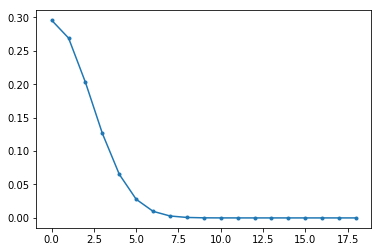

In [6]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

def Gaussian(sigma):
    a = math.ceil(3.5*sigma)
    g = np.zeros(2*a + 1)
    g_tilde = np.zeros(2*a + 1)
    for i in range(len(g_tilde)):
        g_tilde[i] = math.exp(-0.5*(i/sigma)**2)
    k_g = 1/np.sum(g_tilde)
    g = np.multiply(k_g, g_tilde)
    return g

plt.plot(Gaussian(2.3), '.-')

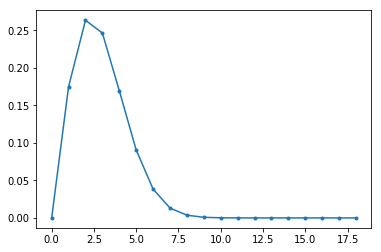

In [7]:
def dGaussian(sigma):
    a = math.ceil(3.5*sigma)
    d = np.zeros(2*a + 1)
    d_tilde = np.zeros(2*a + 1)
    for i in range(len(d_tilde)):
        d_tilde[i] = i*math.exp(-0.5*(i/sigma)**2)
    k_d = 1/np.sum(d_tilde)
    d = np.multiply(k_d, d_tilde)
    return d

plt.plot(dGaussian(2.3), '.-')

### Problem 3.2

Write a function with header

    def gradient(img, sigma=2.5):
    
that computes the gradient of the black-and-white image `img` (a two-dimensional `numpy` array). Your implementation should use the function `scipy.signal.convolve2d` and the kernel functions you wrote for the previous problem. The result should be a pair (that is, a Python tuple of length 2) of `numpy` arrays, each of the same size as `img`. The first array in the pair should be the derivative in the horizontal direction.

The positive coordinate axes are horizontal to the right and vertical down. Make sure you get the signs of the derivatives right, given this convention.

The function `scipy.signal.convolve2d` takes a 2-dimensional kernel, but you _must_ exploit separability of the differentiation kernels for full credit, so you will be calling this function with kernels that are either $k\times 1$ or $1\times k$ for some $k$.

Show your code, and display the `locomotive.jpg` image (provided) and the two gradient images for it. Use the default value of `sigma`, and use `matplotlib.pyplot.imshow` for display.

### Answer

In [8]:
from scipy import signal

In [26]:
from skimage import io, color

In [19]:
img = io.imread('locomotive.jpg')

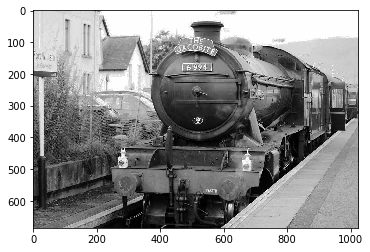

In [20]:
plt.imshow(img, cmap='gray')
plt.show()

In [10]:
np.outer(dGaussian(2.5), Gaussian(2.5)).shape

(19, 19)

In [21]:
signal.convolve2d(img, np.outer(dGaussian(2.5), Gaussian(2.5)), mode='same')

array([[2.16045460e+02, 2.16439112e+02, 2.15719773e+02, ...,
        1.93938776e+00, 5.53253718e-01, 1.35758169e-01],
       [2.15934717e+02, 2.16804761e+02, 2.16522277e+02, ...,
        1.94044360e+00, 5.53554922e-01, 1.35832079e-01],
       [2.15706343e+02, 2.16746890e+02, 2.16751171e+02, ...,
        1.94066006e+00, 5.53616672e-01, 1.35847231e-01],
       ...,
       [4.10372890e+00, 3.97910164e+00, 3.80510015e+00, ...,
        3.97169746e-02, 1.13209692e-02, 2.77573668e-03],
       [1.32959308e+00, 1.28875128e+00, 1.23001565e+00, ...,
        1.27286527e-02, 3.62799597e-03, 8.89493342e-04],
       [3.65671792e-01, 3.54348755e-01, 3.37681080e-01, ...,
        3.47085438e-03, 9.89239077e-04, 2.42527704e-04]])

In [22]:
def gradient(img, sigma=2.5):
    horizontal = signal.convolve2d(img, np.outer(dGaussian(sigma), Gaussian(sigma)), mode='same')
    vertical = signal.convolve2d(img, np.outer(Gaussian(sigma), dGaussian(sigma)), mode='same')
    return horizontal, vertical

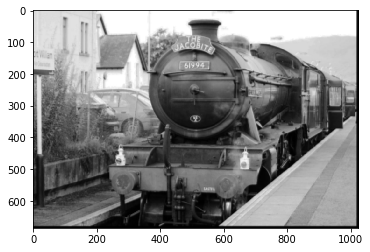

In [23]:
plt.imshow(gradient(img)[0], cmap='gray')
plt.show()

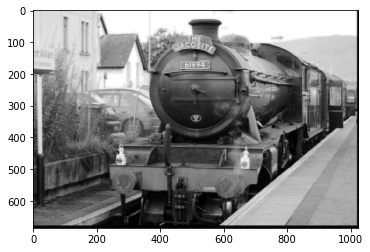

In [24]:
plt.imshow(gradient(img)[1], cmap='gray')
plt.show()

### Problem 3.3

Compute and display the magnitude of the gradient for `locomotive.jpg`. Show your code and the output.

### Answer